### Introduction to Convolutional Neural Networks

## What are Convolutional Neural Networks (CNNs)?

Convolutional Neural Networks (CNNs) are a specialized type of neural network designed to process structured grid data, such as images. They are particularly effective for image-related tasks like classification, object detection, and segmentation.

---

### Why Use CNNs for Image Processing?

- **Spatial Hierarchies:**  
    CNNs capture spatial and hierarchical patterns in images. Convolutional layers extract features such as edges, textures, and complex structures at different levels of abstraction.

- **Parameter Efficiency:**  
    Unlike fully connected networks, CNNs use fewer parameters due to shared weights and local connectivity. This reduces computation and memory requirements, making them scalable for large images.

---

### CNN Architecture Overview

1. **Convolutional Layers:**  
     - Perform convolution operations to extract features from the input image.
     - **Kernel/Filter:** A small matrix that slides over the input to detect patterns (e.g., edges, corners).
     - **Feature Maps:** The output of convolution, highlighting specific patterns in the input.

2. **Activation Functions:**  
     - Commonly use ReLU (Rectified Linear Unit) to introduce non-linearity, enabling the network to learn complex patterns.

3. **Pooling Layers:**  
     - Downsample feature maps to reduce spatial dimensions and computation.
     - **Max Pooling:** Takes the maximum value in each region.
     - **Average Pooling:** Takes the average value in each region.
     - Helps achieve translation invariance and reduces overfitting.

4. **Fully Connected Layers:**  
     - Combine extracted features for final predictions.
     - Act as a classifier in the network, mapping learned features to output classes.

5. **Basic CNN Workflow:**  
     `Input Image → Convolution → Activation → Pooling → (Repeat) → Fully Connected Layer → Output`

---

### Advantages of CNNs Over Fully Connected Networks for Images

- **Translation Invariance:**  
    CNNs can detect patterns regardless of their position in the image, thanks to local receptive fields and pooling.

- **Reduced Parameters:**  
    Shared weights and local connectivity make CNNs computationally efficient and less prone to overfitting.

- **Automatic Feature Extraction:**  
    CNNs learn to identify meaningful patterns (edges, shapes, textures) directly from data, eliminating the need for manual feature engineering.

---

**Summary:**  
CNNs are the backbone of modern computer vision, enabling machines to interpret and understand visual data with high accuracy and efficiency.

In [2]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


load dataset

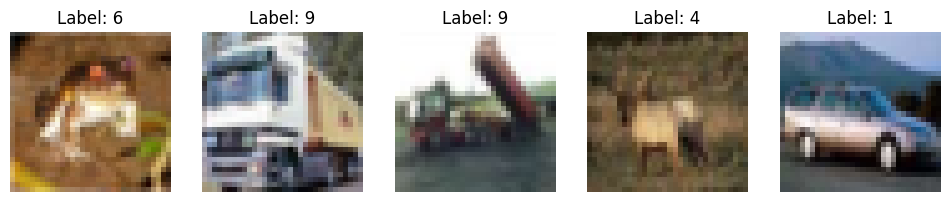

In [4]:
tranform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(
    root="./data", train=True, transform=tranform, download=True
)

# visualise sample images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.permute(1, 2, 0))
    axes[i].axis("off")
    axes[i].set_title(f"Label: {label}")

plt.show()

Displayer pexel values for the first image

In [5]:
import numpy as np
image, label = train_dataset[0]
print(f"Label: {label}")
print(f"Image Shape: {image.shape}")
print("Pixel Values")
print(image)

Label: 6
Image Shape: torch.Size([3, 32, 32])
Pixel Values
tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],

Create models

In [6]:
import tensorflow as tf

# define a simple CNN model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

# compule the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Tensorflow CNN is ready")

Tensorflow CNN is ready


c:\Users\Cyrus\Documents\AI Mastery\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
import torch.nn as nn


# define simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, activation="relu")
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 15 * 15, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 15 * 15)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


print("Pytorch CNN is ready")

Pytorch CNN is ready
